In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\zahri\anaconda_projects\AsaiProjekt\Asai-Projekt\heart_2020_cleaned.csv")
#df = pd.read_csv("/Users/aurelia/Documents/GitHub/Asai-Projekt/heart_2020_cleaned.csv")
df_orginal = df.copy()

In [2]:

#DataFrame-Stylee
styled_df = df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.600000,Yes,No,No,3.000000,30.000000,No,Female,55-59,White,Yes,Yes,Very good,5.000000,Yes,No,Yes
1,No,20.340000,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.000000,No,No,No
2,No,26.580000,Yes,No,No,20.000000,30.000000,No,Male,65-69,White,Yes,Yes,Fair,8.000000,Yes,No,No
3,No,24.210000,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.000000,No,No,Yes
4,No,23.710000,No,No,No,28.000000,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.000000,No,No,No
5,Yes,28.870000,Yes,No,No,6.000000,0.000000,Yes,Female,75-79,Black,No,No,Fair,12.000000,No,No,No
6,No,21.630000,No,No,No,15.000000,0.000000,No,Female,70-74,White,No,Yes,Fair,4.000000,Yes,No,Yes
7,No,31.640000,Yes,No,No,5.000000,0.000000,Yes,Female,80 or older,White,Yes,No,Good,9.000000,Yes,No,No
8,No,26.450000,No,No,No,0.000000,0.000000,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.000000,No,Yes,No
9,No,40.690000,No,No,No,0.000000,0.000000,Yes,Male,65-69,White,No,Yes,Good,10.000000,No,No,No


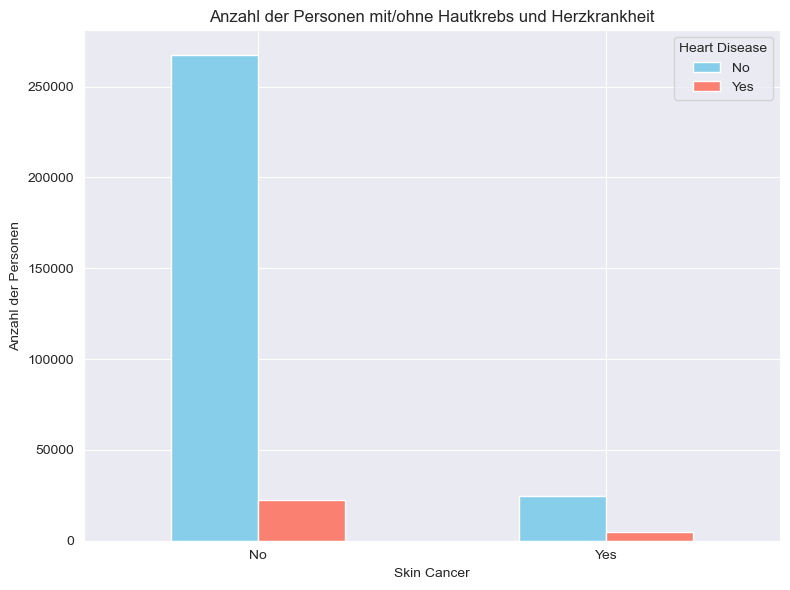

In [3]:
table = pd.crosstab(df["SkinCancer"], df["HeartDisease"])

#Balkendiagramm
table.plot(kind='bar', stacked=False, figsize=(8,6), color=['skyblue', 'salmon'])
plt.title('Anzahl der Personen mit/ohne Hautkrebs und Herzkrankheit')
plt.xlabel('Skin Cancer')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

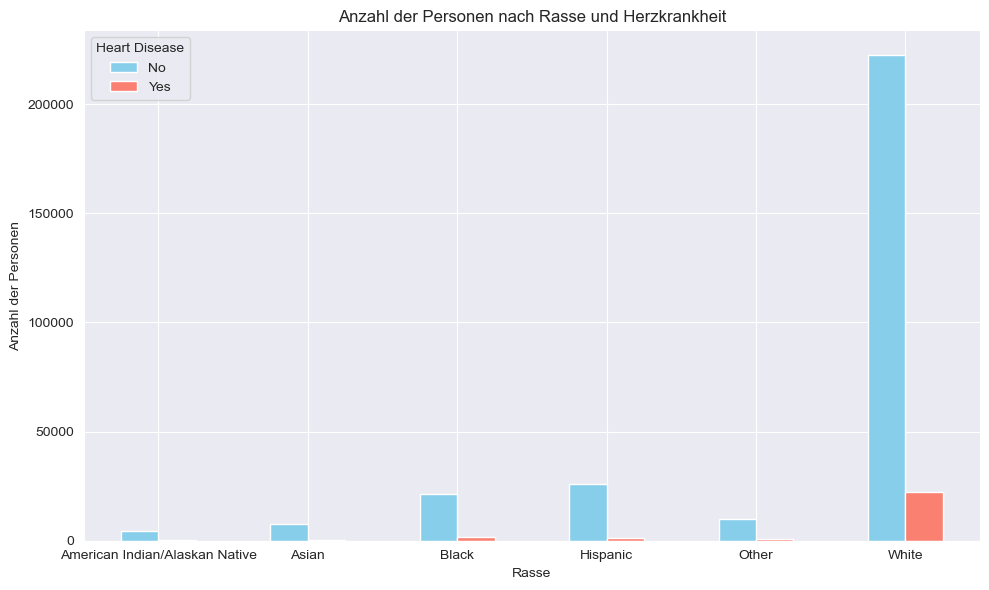

In [4]:
table = pd.crosstab(df["Race"], df["HeartDisease"])

#Balkendiagramm
table.plot(kind='bar', stacked=False, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Anzahl der Personen nach Rasse und Herzkrankheit')
plt.xlabel('Rasse')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

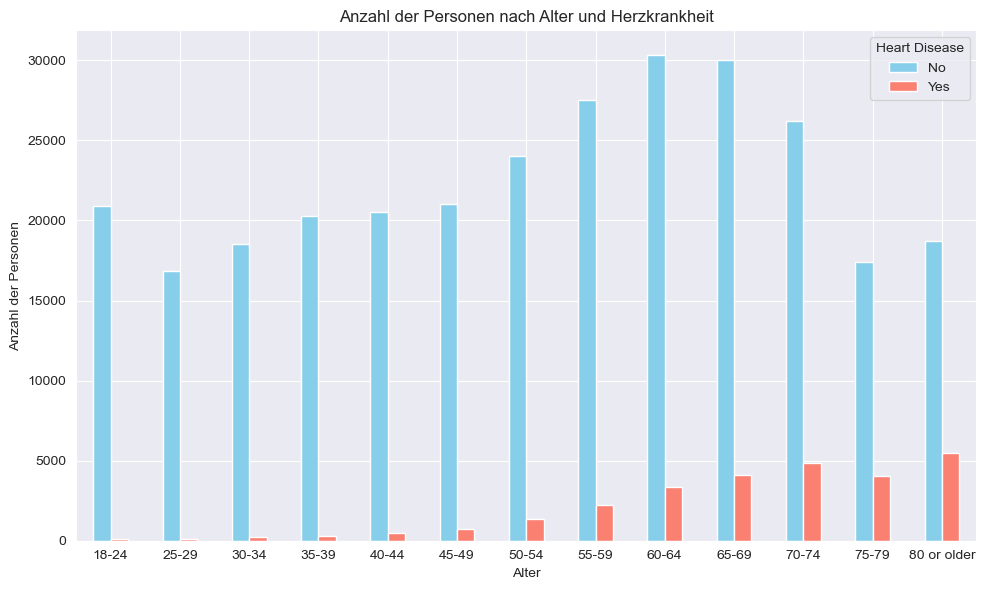

In [6]:
table = pd.crosstab(df["AgeCategory"], df["HeartDisease"])

#Balkendiagramm
table.plot(kind='bar', stacked=False, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Anzahl der Personen nach Alter und Herzkrankheit')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()


In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
bmi_too_high = df["BMI"] > 70
count_BMI_too_high = bmi_too_high.sum()
total_count = len(df)
print("Anzahl der Datensätze mit BMI über 70:", count_BMI_too_high)
print("Gesamtzahl der Datensätze:", total_count)
print("Prozentualer Anteil: {:.2f}%".format((count_BMI_too_high / total_count) * 100))

bmi_too_high_df = df[bmi_too_high]

#Formatierte Tabelle
bmi_too_high_df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})


Anzahl der Datensätze mit BMI über 70: 129
Gesamtzahl der Datensätze: 319795
Prozentualer Anteil: 0.04%


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
561,No,75.820000,No,No,No,0.000000,0.000000,No,Female,50-54,White,No,Yes,Good,8.000000,Yes,Yes,No
9088,No,82.760000,No,No,No,1.000000,0.000000,No,Female,50-54,Hispanic,Yes,Yes,Good,10.000000,No,No,No
9358,Yes,75.770000,Yes,Yes,Yes,0.000000,30.000000,Yes,Male,30-34,Black,Yes,No,Fair,15.000000,Yes,No,No
9499,Yes,83.000000,Yes,Yes,Yes,30.000000,30.000000,Yes,Male,50-54,Asian,No,No,Poor,18.000000,Yes,Yes,No
10659,No,81.460000,No,No,No,0.000000,0.000000,Yes,Female,50-54,Hispanic,No,Yes,Good,6.000000,No,No,No
13867,No,72.560000,No,No,No,0.000000,0.000000,No,Male,60-64,Other,No,No,Good,6.000000,No,No,No
16074,No,71.800000,No,No,No,0.000000,0.000000,Yes,Female,60-64,White,No,No,Good,7.000000,No,No,No
18927,Yes,79.100000,No,No,No,30.000000,30.000000,Yes,Female,70-74,Black,No,No,Poor,3.000000,No,No,No
21221,No,71.450000,No,No,Yes,30.000000,0.000000,Yes,Male,35-39,Hispanic,No,Yes,Poor,6.000000,Yes,No,No
24008,No,70.720000,No,No,No,30.000000,5.000000,Yes,Female,55-59,Hispanic,Yes,No,Poor,5.000000,Yes,Yes,No


In [9]:
sleepTime_too_high = df["SleepTime"] > 20
count_sleepTime_too_high = sleepTime_too_high.sum()
total_count = len(df)
print("Anzahl der Datensätze mit Sleep Time über 20:", count_sleepTime_too_high)
print("Gesamtzahl der Datensätze:", total_count)
print("Prozentualer Anteil: {:.2f}%".format((count_sleepTime_too_high / total_count) * 100))

sleepTime_too_high_df = df[sleepTime_too_high]

#Formatierte Tabelle
sleepTime_too_high_df.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

Anzahl der Datensätze mit Sleep Time über 20: 44
Gesamtzahl der Datensätze: 319795
Prozentualer Anteil: 0.01%


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
12339,No,28.150000,Yes,No,No,7.000000,30.000000,No,Female,55-59,American Indian/Alaskan Native,No,Yes,Very good,24.000000,No,No,No
15736,Yes,24.410000,No,No,No,20.000000,0.000000,Yes,Female,80 or older,White,No,Yes,Poor,24.000000,No,No,No
17845,No,38.090000,No,No,No,25.000000,25.000000,Yes,Female,55-59,White,No,Yes,Fair,24.000000,No,No,No
18257,No,36.330000,No,No,No,3.000000,5.000000,Yes,Male,50-54,Black,No,No,Poor,21.000000,Yes,No,No
28794,No,28.510000,No,No,Yes,0.000000,0.000000,Yes,Male,18-24,Other,No,No,Excellent,24.000000,No,No,Yes
30792,Yes,21.300000,Yes,Yes,Yes,29.000000,30.000000,No,Male,18-24,White,Yes,Yes,Excellent,22.000000,No,No,Yes
37508,No,48.820000,No,No,No,30.000000,30.000000,No,Male,18-24,White,No,No,Excellent,24.000000,No,No,No
40015,No,36.360000,Yes,No,No,30.000000,30.000000,Yes,Female,25-29,White,No,No,Good,24.000000,No,No,No
40288,No,21.460000,No,No,No,14.000000,10.000000,Yes,Female,35-39,Hispanic,Yes,No,Fair,24.000000,No,No,No
40858,No,31.090000,No,No,No,20.000000,15.000000,Yes,Female,50-54,Black,No,Yes,Poor,24.000000,No,Yes,Yes


Prozentualer Anteil:
 HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64


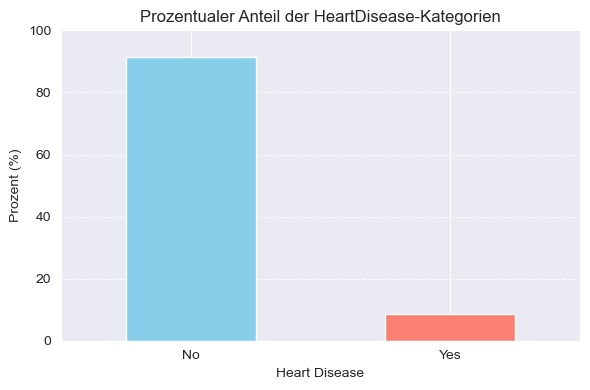

In [10]:
#Prozentualer Anteil HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts(normalize=True) * 100
print("Prozentualer Anteil:\n", heart_disease_counts)

#Balkendiagramm
plt.figure(figsize=(6,4))
heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Prozentualer Anteil der HeartDisease-Kategorien')
plt.ylabel('Prozent (%)')
plt.xlabel('Heart Disease')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

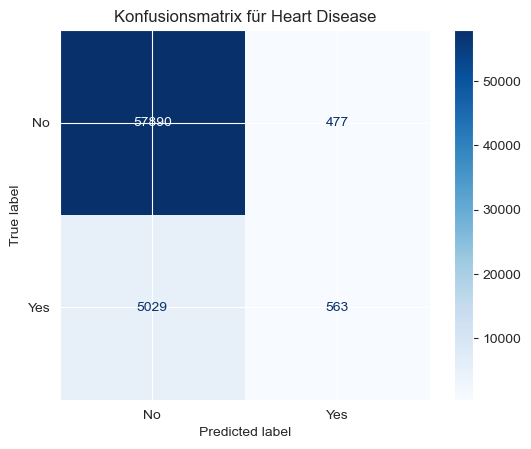

Genauigkeit: 0.9139136009005769


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


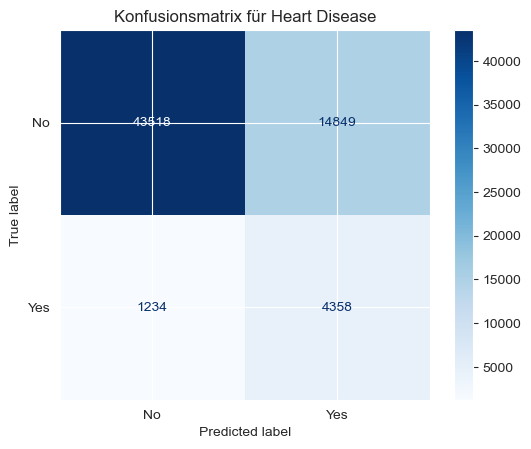

Genauigkeit: 0.748542034741006


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


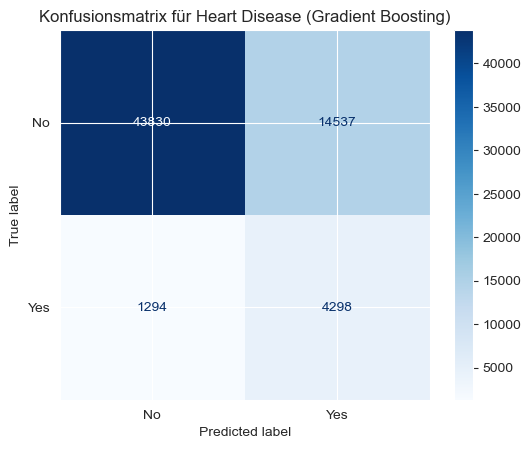

Genauigkeit: 0.7524820588189309


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# sample_weight für Balancing berechnen
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease (Gradient Boosting)')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


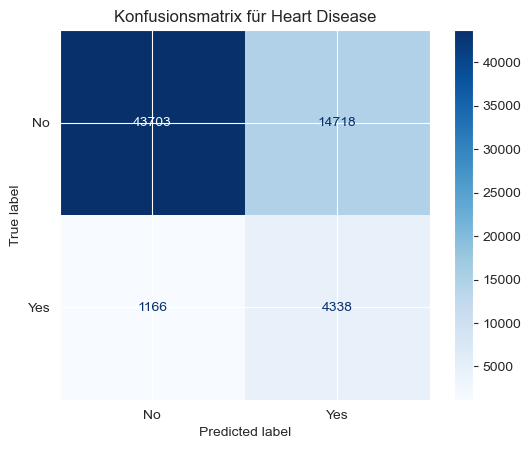

Genauigkeit: 0.7515213140398905


In [14]:
df_adjusted = df[(df["SleepTime"] <= 20) & (df["BMI"] < 70)]

X = df_adjusted.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df_adjusted['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)

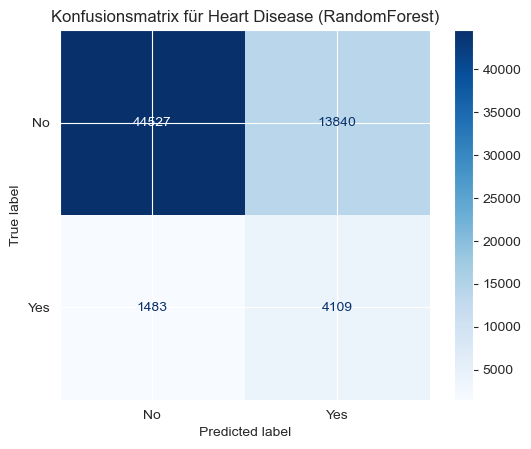

Genauigkeit: 0.7604246470395097


In [15]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # kannst du anpassen
    class_weight='balanced',  # wichtig für unbalancierte Daten
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix für Heart Disease (RandomForest)')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


In [16]:
df_adjusted = df[(df["SleepTime"] >= 3) & (df["SleepTime"] <= 20) & (df["BMI"] < 70)]
df_adjusted = df_adjusted.drop("Race", axis = 1)

X = df_adjusted.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df_adjusted['HeartDisease'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('KM für HD mit Adjusted')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)

KeyboardInterrupt: 

In [16]:
for col in df_adjusted.columns:
    print(f"\nColumn: {col}")
    print(df_adjusted[col].value_counts())




Column: HeartDisease
HeartDisease
No     291122
Yes     27164
Name: count, dtype: int64

Column: BMI
BMI
26.63    3753
27.46    2758
27.44    2711
24.41    2685
27.12    2512
         ... 
57.41       1
67.30       1
45.71       1
38.43       1
46.56       1
Name: count, Length: 3486, dtype: int64

Column: Smoking
Smoking
No     187069
Yes    131217
Name: count, dtype: int64

Column: AlcoholDrinking
AlcoholDrinking
No     296612
Yes     21674
Name: count, dtype: int64

Column: Stroke
Stroke
No     306346
Yes     11940
Name: count, dtype: int64

Column: PhysicalHealth
PhysicalHealth
0.0     225751
30.0     19230
2.0      14836
1.0      10445
3.0       8584
5.0       7568
10.0      5433
15.0      4976
7.0       4597
4.0       4441
20.0      3183
14.0      2871
6.0       1266
25.0      1148
8.0        920
21.0       623
12.0       594
28.0       439
29.0       197
9.0        178
18.0       167
16.0       132
27.0       122
17.0       110
13.0        90
22.0        88
11.0        85
24.0 

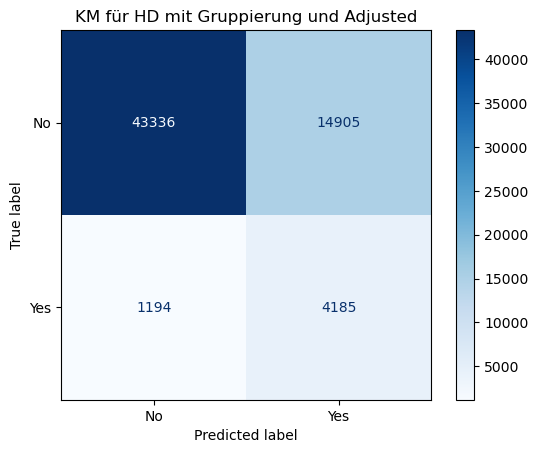

Genauigkeit: 0.7469506444514303


In [17]:
# 1. Unrealistische Werte vorher entfernen
df = df_orginal.copy()
df_adjusted = df[(df["SleepTime"] >= 3) & (df["SleepTime"] <= 16) & (df["BMI"] < 70)].copy()
df_adjusted = df_adjusted.drop("Race", axis = 1)

# 2. BMI in Gruppen einteilen
df_adjusted["BMI_Gruppe"] = pd.cut(
    df_adjusted["BMI"],
    bins=[0, 18.5, 25, 30, 35, float("inf")],
    labels=["Untergewicht", "Normalgewicht", "Übergewicht", "Adipositas", "Schwere Adipositas"]
)

# 3. Schlafzeit in Gruppen einteilen
df_adjusted["Sleep_Group"] = pd.cut(
    df_adjusted["SleepTime"],
    bins=[0, 5, 6, 9, 10, float("inf")],
    labels=["Zu wenig", "Etwas wenig", "Empfohlen", "Eher viel", "Viel zu viel"]
)
# PhysicalHealth gruppieren
df_adjusted["PhysicalHealth_Group"] = pd.cut(
    df_adjusted["PhysicalHealth"],
    bins=[-1, 0, 5, 14, 25, 30],
    labels=["Keine", "Leicht", "Mittel", "Schwer", "Dauerhaft"]
)

# MentalHealth gruppieren
df_adjusted["MentalHealth_Group"] = pd.cut(
    df_adjusted["MentalHealth"],
    bins=[-1, 0, 5, 14, 25, 30],
    labels=["Keine", "Leicht", "Mittel", "Schwer", "Dauerhaft"]
)



# 4. Originalspalten entfernen
df_adjusted = df_adjusted.drop(["BMI", "SleepTime","MentalHealth","PhysicalHealth"], axis=1)

y = df_adjusted['HeartDisease'].map({'No': 0, 'Yes': 1})

X = df_adjusted.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('KM für HD mit Gruppierung und Adjusted')
plt.show()

# 10. Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)


In [18]:
styled_df = df_adjusted.head(10).style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid #ddd'), ('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

styled_df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI_Gruppe,Sleep_Group,PhysicalHealth_Group,MentalHealth_Group
0,No,Yes,No,No,No,Female,55-59,Yes,Yes,Very good,Yes,No,Yes,Untergewicht,Zu wenig,Leicht,Dauerhaft
1,No,No,No,Yes,No,Female,80 or older,No,Yes,Very good,No,No,No,Normalgewicht,Empfohlen,Keine,Keine
2,No,Yes,No,No,No,Male,65-69,Yes,Yes,Fair,Yes,No,No,Übergewicht,Empfohlen,Schwer,Dauerhaft
3,No,No,No,No,No,Female,75-79,No,No,Good,No,No,Yes,Normalgewicht,Etwas wenig,Keine,Keine
4,No,No,No,No,Yes,Female,40-44,No,Yes,Very good,No,No,No,Normalgewicht,Empfohlen,Dauerhaft,Keine
5,Yes,Yes,No,No,Yes,Female,75-79,No,No,Fair,No,No,No,Übergewicht,Viel zu viel,Mittel,Keine
6,No,No,No,No,No,Female,70-74,No,Yes,Fair,Yes,No,Yes,Normalgewicht,Zu wenig,Schwer,Keine
7,No,Yes,No,No,Yes,Female,80 or older,Yes,No,Good,Yes,No,No,Adipositas,Empfohlen,Leicht,Keine
8,No,No,No,No,No,Female,80 or older,"No, borderline diabetes",No,Fair,No,Yes,No,Übergewicht,Zu wenig,Keine,Keine
9,No,No,No,No,Yes,Male,65-69,No,Yes,Good,No,No,No,Schwere Adipositas,Eher viel,Keine,Keine


max_depth=2, CV-Genauigkeit=0.7765
max_depth=3, CV-Genauigkeit=0.7660
max_depth=4, CV-Genauigkeit=0.7681
max_depth=5, CV-Genauigkeit=0.7650
max_depth=6, CV-Genauigkeit=0.7621
max_depth=7, CV-Genauigkeit=0.7612
max_depth=8, CV-Genauigkeit=0.7623
max_depth=9, CV-Genauigkeit=0.7621
max_depth=10, CV-Genauigkeit=0.7615
max_depth=11, CV-Genauigkeit=0.7625
max_depth=12, CV-Genauigkeit=0.7657
max_depth=13, CV-Genauigkeit=0.7690
max_depth=14, CV-Genauigkeit=0.7765
max_depth=15, CV-Genauigkeit=0.7845
max_depth=16, CV-Genauigkeit=0.7939
max_depth=17, CV-Genauigkeit=0.8032
max_depth=18, CV-Genauigkeit=0.8134
max_depth=19, CV-Genauigkeit=0.8249
max_depth=20, CV-Genauigkeit=0.8353

Beste max_depth: 20 mit Genauigkeit 0.8353


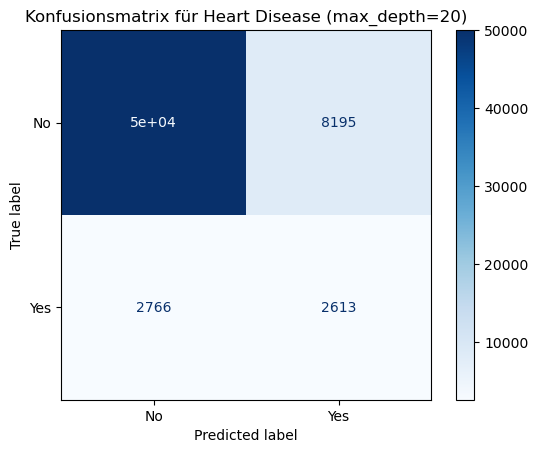

Test-Genauigkeit: 0.8277114115058157


In [19]:
from sklearn.model_selection import cross_val_score

# Schritt 1: Hyperparameter testen
best_depth = None
best_score = 0

for depth in range(2, 21):  # Teste max_depth von 2 bis 20
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        class_weight='balanced',
        random_state=42
    )
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    print(f"max_depth={depth}, CV-Genauigkeit={mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

print(f"\nBeste max_depth: {best_depth} mit Genauigkeit {best_score:.4f}")

# Schritt 2: Trainieren mit der besten Tiefe
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=best_depth,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# Schritt 3: Vorhersagen & Auswertung
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title(f'Konfusionsmatrix für Heart Disease (max_depth={best_depth})')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Test-Genauigkeit:", accuracy)


max_depth=2, Recall für 'Yes': 0.6224
max_depth=3, Recall für 'Yes': 0.6555
max_depth=4, Recall für 'Yes': 0.6620
max_depth=5, Recall für 'Yes': 0.6778
max_depth=6, Recall für 'Yes': 0.7009
max_depth=7, Recall für 'Yes': 0.7105
max_depth=8, Recall für 'Yes': 0.7249
max_depth=9, Recall für 'Yes': 0.7269
max_depth=10, Recall für 'Yes': 0.7336
max_depth=11, Recall für 'Yes': 0.7501
max_depth=12, Recall für 'Yes': 0.7477
max_depth=13, Recall für 'Yes': 0.7405
max_depth=14, Recall für 'Yes': 0.7221
max_depth=15, Recall für 'Yes': 0.7102
max_depth=16, Recall für 'Yes': 0.6840
max_depth=17, Recall für 'Yes': 0.6484
max_depth=18, Recall für 'Yes': 0.5945
max_depth=19, Recall für 'Yes': 0.5406
max_depth=20, Recall für 'Yes': 0.4858

Beste max_depth (nach Recall): 11 mit Recall=0.7501


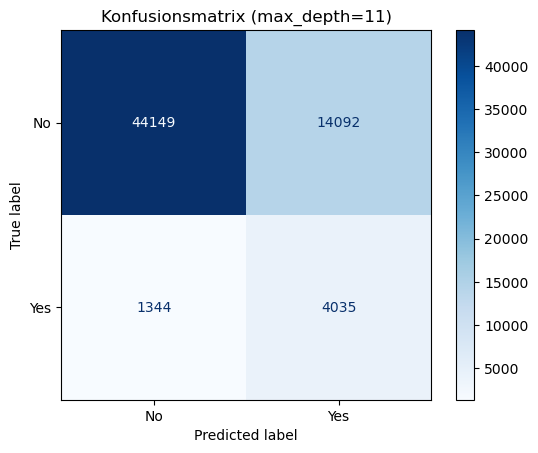


Auswertung (Testdaten):
              precision    recall  f1-score   support

          No       0.97      0.76      0.85     58241
         Yes       0.22      0.75      0.34      5379

    accuracy                           0.76     63620
   macro avg       0.60      0.75      0.60     63620
weighted avg       0.91      0.76      0.81     63620



In [20]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    recall_score,
    classification_report
)
# 7. Zielvariable
y = df_adjusted['HeartDisease'].map({'No': 0, 'Yes': 1})

# 8. Features (ohne Zielspalte)
X = df_adjusted.drop('HeartDisease', axis=1)

# 9. One-Hot-Encoding (Dummies)
X = pd.get_dummies(X, drop_first=True)

# 10. Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 11. Beste max_depth per Recall ermitteln
best_depth = None
best_recall = 0

for depth in range(2, 21):
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        class_weight='balanced',
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, pos_label=1)
    print(f"max_depth={depth}, Recall für 'Yes': {recall:.4f}")

    if recall > best_recall:
        best_recall = recall
        best_depth = depth

print(f"\nBeste max_depth (nach Recall): {best_depth} mit Recall={best_recall:.4f}")

# 12. Finales Modell mit bester Tiefe trainieren
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=best_depth,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 13. Konfusionsmatrix anzeigen
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title(f'Konfusionsmatrix (max_depth={best_depth})')
plt.show()

# 14. Report
print("\nAuswertung (Testdaten):")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))